## TWO WAY ANOVA

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Create a dataset
import numpy as np
import pandas as pd

df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15), 
                   'sun': np.tile(np.repeat(['low', 'medium', 'high'],5),2),
                   'height':[6,6,6,5,6,5,5,6,4,5,6,6,7,8,7,3,4,4,4,5,4,4,4,4,
                             5,6,6,7,8, 7]})


                   

In [7]:
df.head()

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6


<AxesSubplot: xlabel='sun', ylabel='height'>

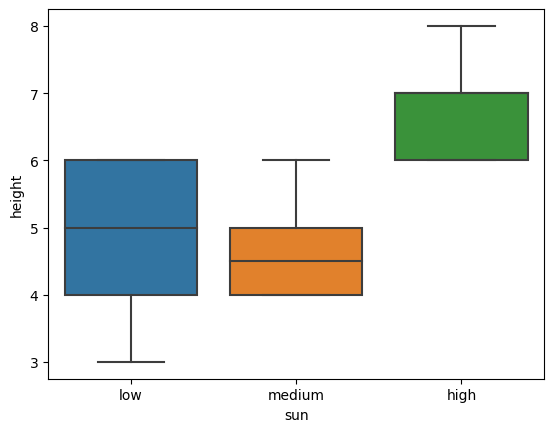

In [9]:
sns.boxplot(x='sun', y='height', data=df)

<AxesSubplot: xlabel='sun', ylabel='height'>

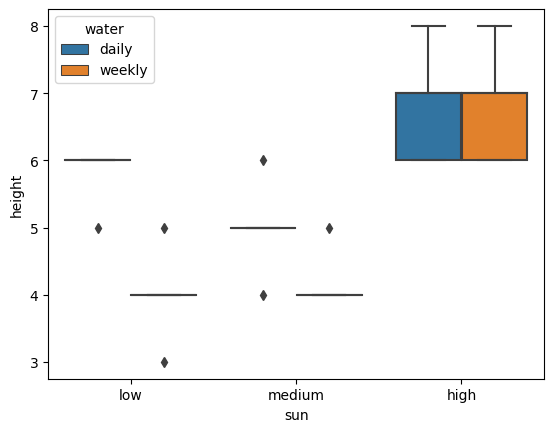

In [11]:
sns.boxplot(x='sun', y='height',hue = 'water', data=df)

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# ANOVA
model = ols('height ~sun', data=df).fit()
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,28.466667,14.233333,18.38756,0.000009
Residual,27.0,20.900000,0.774074,NaN,NaN


In [13]:
# Two-way-ANOVA
model = ols('height ~C(sun) + C(water) + C(sun) : C(water)', data=df).fit()
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,28.466667,14.233333,30.500000,2.567484e-07
C(water),1.0,5.633333,5.633333,12.071429,1.962727e-03
C(sun):C(water),2.0,4.066667,2.033333,4.357143,2.430444e-02
Residual,24.0,11.200000,0.466667,NaN,NaN


In [14]:
# another way of doing this 
import pingouin as pg 
aov = pg.anova(data= df, dv= 'height', between= 
               ['sun', 'water'], detailed= True)
print(aov)

        Source         SS  DF         MS          F         p-unc       np2
0          sun  28.466667   2  14.233333  30.500000  2.567484e-07  0.717647
1        water   5.633333   1   5.633333  12.071429  1.962727e-03  0.334653
2  sun * water   4.066667   2   2.033333   4.357143  2.430444e-02  0.266376
3     Residual  11.200000  24   0.466667        NaN           NaN       NaN


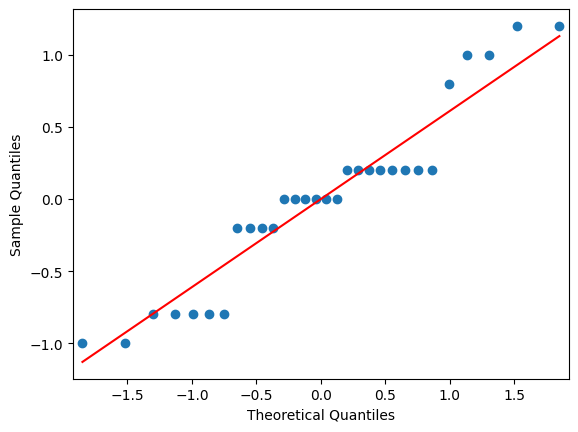

In [15]:
# qq norm plot

res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()